#### Install yfinance

In [1]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 8.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf
import pandas as pd
from fbprophet import Prophet

In [6]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=True)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Ticker

In [7]:
ticker = "^IXIC"
# nasdaq: ^IXIC
# apple: AAPL
# microsoft: MSFT
# google: GOOG
# amazon: AMZN
# tesla: TSLA
# berkshire: BRK-A
# meta: FB
# netflix: NFLX

# samsung: SMSN.IL

# bitcoin: BTC-USD
# ethereum: ETH-USD
# doge: DOGE-USD

# gold: GC=F
# copper: HG=F

# https://finance.yahoo.com
# https://companiesmarketcap.com

In [8]:
price = yf.Ticker(ticker).info["regularMarketPrice"]
price

11354.617

# Prediction

## 1.5달 예측

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
165,2022-06-30,8992.348700,8225.682432,9717.053650
166,2022-07-01,8879.236140,8150.194838,9632.937130
167,2022-07-02,8917.196185,8122.425028,9680.692816
168,2022-07-03,8859.178920,8074.082701,9658.100315
169,2022-07-04,8789.418033,7972.099917,9558.849614


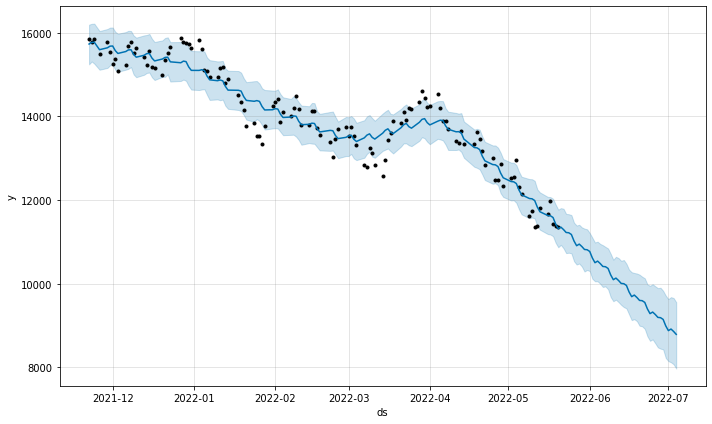

In [9]:
make_forecast(ticker, int(365/2/4), "6mo").tail() # 1.5달 예측

## 3달 예측

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
339,2022-08-15,10376.035362,9708.359970,10973.367278
340,2022-08-16,10370.672612,9723.941419,10995.567303
341,2022-08-17,10357.291574,9723.976440,10965.831730
342,2022-08-18,10301.183218,9652.594728,10935.505112
343,2022-08-19,10244.831837,9618.007625,10910.525187


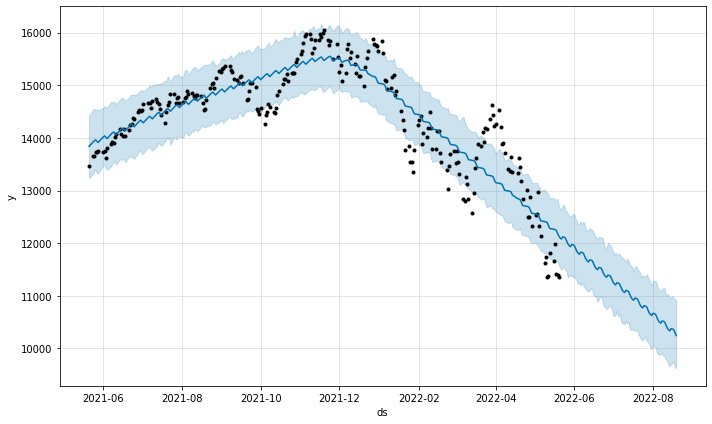

In [10]:
make_forecast(ticker, int(365/4), "1y").tail() 

## 6달 예측

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
682,2022-11-14,8434.474983,7559.423842,9380.097155
683,2022-11-15,8430.886986,7556.185681,9418.705114
684,2022-11-16,8408.597227,7582.005272,9389.177396
685,2022-11-17,8363.722025,7433.460599,9328.313003
686,2022-11-18,8330.079718,7422.835444,9357.949386


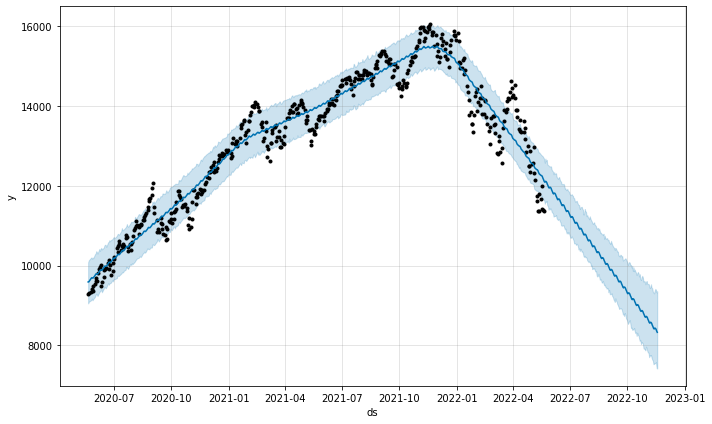

In [11]:
make_forecast(ticker, int(365*2/4), "2y").tail() 

## 15달 예측

,ds,yhat,yhat_lower,yhat_upper
1711,2023-08-15,12631.597898,7105.536775,17841.751467
1712,2023-08-16,12642.559723,7204.883860,17973.816206
1713,2023-08-17,12646.354266,6982.637432,18015.323056
1714,2023-08-18,12654.731390,6989.148393,17981.419695
1715,2023-08-19,12605.716081,6943.835521,17895.927672


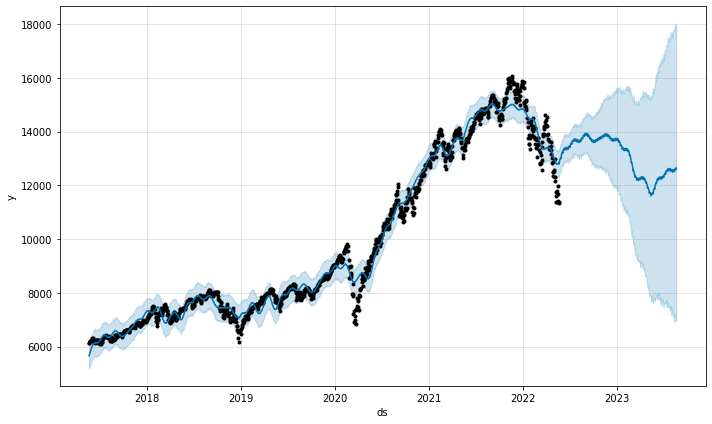

In [12]:
make_forecast(ticker, int(365*5/4), "5y").tail()

## 2.5년 예측

,ds,yhat,yhat_lower,yhat_upper
3425,2024-11-13,22762.077869,20680.425420,24816.009782
3426,2024-11-14,22767.642536,20821.989802,24768.931792
3427,2024-11-15,22773.641108,20776.430114,24753.363419
3428,2024-11-16,22816.822643,20757.788651,24936.400637
3429,2024-11-17,22827.501831,20761.404923,24966.718737


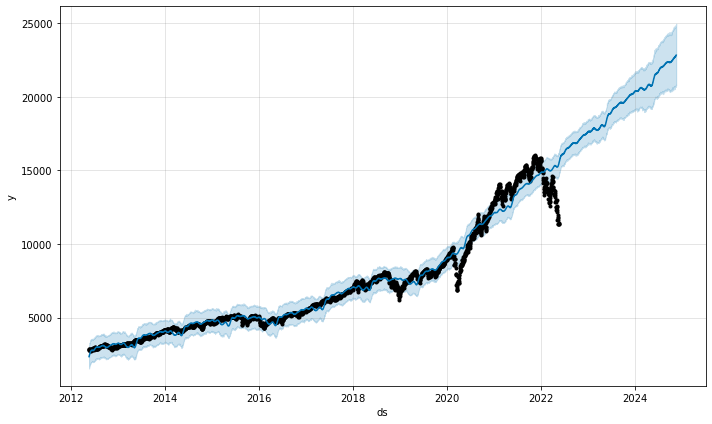

In [13]:
make_forecast(ticker, int(365*10/4), "10y").tail()

## 상장기간 이후 1/4 예측

,ds,yhat,yhat_lower,yhat_upper
16166,2031-03-24,21827.892001,17336.126669,26160.297448
16167,2031-03-25,21833.802680,17215.828837,26183.934611
16168,2031-03-26,21837.865187,17325.972450,26317.113867
16169,2031-03-27,21840.904248,17264.083018,26168.164953
16170,2031-03-28,21840.893697,17372.243068,26305.764932


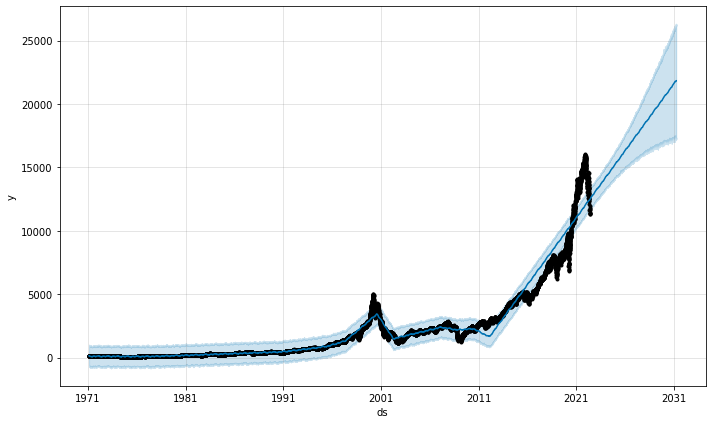

In [14]:
make_forecast(ticker, int(len(yf.Ticker(ticker).history(period="max", auto_adjust=True))/4), "max").tail()